**Notebook by [Daniel Fojo](https://www.linkedin.com/in/daniel-fojo/)**

# Linear Regression with TensorFlow

## Necessary imports
Tested for TensorFlow 1.13.1

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.__version__

'1.13.1'

## Data loading
We will try to predict new values for $x$ given the following pairs of values. If our regressor works properly it should learn approximately $W=5$, $b=3$.

In [0]:
# Training Data
train_X = np.random.randn(20)
train_Y = 5*train_X + 3 + np.random.randn(20)/3
n_samples = train_X.shape[0]
print("X: ", train_X, "\nY: ", train_Y)

X:  [ 1.24576045 -1.97365488  1.05470419  0.06148743 -0.63537638  2.20323748
 -0.14119531  1.6086722  -0.68252082 -0.63787958  0.44786438  0.71295363
 -0.21546296 -1.34591377  0.89343033 -1.26618021 -0.46662309  0.01559851
  0.99199977 -0.61808561] 
Y:  [ 8.9802903  -7.04339523  8.93566227  3.26131023  0.22168671 13.92964197
  2.48449274 11.26201493 -0.62499698 -0.20891011  6.12042894  7.01624624
  2.27099763 -3.38807304  7.69115517 -3.38163181  0.75798866  3.55131569
  7.86122364 -0.07560479]


## Declaring the graph
In TensorFlow, we have to define the computational graph first.

In [0]:
# Inputs
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable(name="weight", shape=[1])
b = tf.get_variable(name="bias", shape=[1])

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

Instructions for updating:
Colocations handled automatically by placer.


As you can see, the variables don't have any numerical value yet.

In [0]:
print('X:', X)
print('Y:', Y)
print('W:', W)
print('b:', b)
print('pred:', pred)

X: Tensor("Placeholder:0", dtype=float32)
Y: Tensor("Placeholder_1:0", dtype=float32)
W: <tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
b: <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
pred: Tensor("Add:0", dtype=float32)


In [0]:
# Mean square error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/n_samples
# Gradient descent optimizer to minimize the MSE
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

Instructions for updating:
Use tf.cast instead.


We should now initialize the session, to start feeding data to our regressor.

In [0]:
# Create session
sess = tf.InteractiveSession()

# Initialize the variables before performing any computation
init = sess.run(tf.global_variables_initializer())

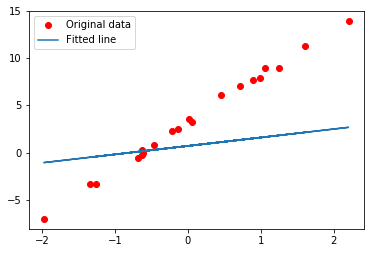

In [0]:
# Graphic display *before* training
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [0]:
# Fit all training data
for epoch in range(100):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % 10 == 0:
        # Calculate the average cost for the epoch saving each step in `all_costs`
        all_costs = []
        for (x, y) in zip(train_X, train_Y):
            all_costs.append(sess.run(cost, feed_dict={X: x, Y: y}))
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(np.mean(all_costs)), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
all_costs = []
for (x, y) in zip(train_X, train_Y):
    all_costs.append(sess.run(cost, feed_dict={X: x, Y: y}))
print("Training cost=", np.mean(all_costs), "W=", sess.run(W), "b=", sess.run(b))


Epoch: 0010 cost= 0.017773740 W= [4.628958] b= [2.9002316]
Epoch: 0020 cost= 0.004490945 W= [5.0001583] b= [3.1376438]
Epoch: 0030 cost= 0.004360937 W= [5.0367627] b= [3.163763]
Epoch: 0040 cost= 0.004360429 W= [5.040329] b= [3.1667006]
Epoch: 0050 cost= 0.004360517 W= [5.0406685] b= [3.167039]
Epoch: 0060 cost= 0.004360526 W= [5.0407014] b= [3.167079]
Epoch: 0070 cost= 0.004360525 W= [5.0407033] b= [3.1670842]
Epoch: 0080 cost= 0.004360528 W= [5.0407033] b= [3.1670845]
Epoch: 0090 cost= 0.004360528 W= [5.0407033] b= [3.1670845]
Epoch: 0100 cost= 0.004360528 W= [5.0407033] b= [3.1670845]
Optimization Finished!
Training cost= 0.0043605277 W= [5.0407033] b= [3.1670845]


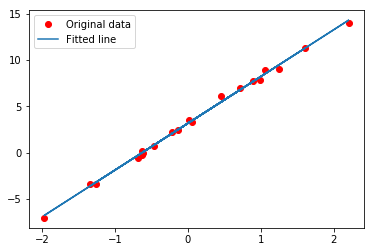

In [0]:
# Graphic display *after* training
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

## Exercise 1:
What is the predicted value for $x=0.5$?

In [0]:
y = sess.run(W) * 0.5 +sess.run(b)
y

array([5.687436], dtype=float32)

In [0]:
x = tf.placeholder(tf.float32)
y = W*x+b
print(sess.run(y, feed_dict={x:0.5}))

[5.687436]


## Exercise 2:
Train a 2 input regression given the following data:

In [0]:
train_X = np.random.randn(20, 2)
train_Y = -1*train_X[:, 0] + 4*train_X[:, 1] + 2 + np.random.randn(20)/3
print("X: ", train_X, "\nY: ", train_Y)

X:  [[ 0.60762092 -0.83549556]
 [ 0.35730478 -0.21725364]
 [-1.74692372 -1.4465264 ]
 [ 1.60759977  0.99889108]
 [-0.89401749  0.47158332]
 [ 0.37381518 -0.04247181]
 [-0.44681438  0.35519005]
 [ 0.73660661 -0.55018617]
 [ 0.85842421  0.93932212]
 [-0.01637569 -0.21855464]
 [-0.45321926  0.37944652]
 [ 1.59729252 -0.58117632]
 [-0.32989152 -0.00319161]
 [-0.19482245 -0.2015509 ]
 [ 0.38919609 -0.26839947]
 [-0.03645934 -0.43098002]
 [-1.09449638  1.03904921]
 [ 0.34090191 -0.74129948]
 [-1.84508728  0.08834671]
 [-1.51726692  0.34473108]] 
Y:  [-1.87378557  1.02002998 -1.64800585  4.67007128  4.77837592  0.98893597
  3.98454557 -0.75602195  4.80333077  1.10336203  3.21232974 -1.8385888
  2.23452551  1.52234136  0.47358115  0.09171056  7.4207902  -1.26019622
  4.14954524  4.81267675]


**Hint:** In TensorFlow each variable should have a different name, so you cannot use the names "weight" and "bias"

In [0]:
# Inputs
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable(name="weight3", shape=[2])
b = tf.get_variable(name="bias3", shape=[1])

# Construct a linear model
pred = tf.add(tf.reduce_sum(tf.multiply(X, W)), b)

In [0]:
# Mean square error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/n_samples
# Gradient descent optimizer to minimize the MSE
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [0]:
# Create session
sess = tf.InteractiveSession()

# Initialize the variables before performing any computation
init = sess.run(tf.global_variables_initializer())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# Fit all training data
for epoch in range(100):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % 10 == 0:
        # Calculate the average cost for the epoch saving each step in `all_costs`
        all_costs = []
        for (x, y) in zip(train_X, train_Y):
            all_costs.append(sess.run(cost, feed_dict={X: x, Y: y}))
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(np.mean(all_costs)), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
all_costs = []
for (x, y) in zip(train_X, train_Y):
    all_costs.append(sess.run(cost, feed_dict={X: x, Y: y}))
print("Training cost=", np.mean(all_costs), "W=", sess.run(W), "b=", sess.run(b))

Epoch: 0010 cost= 0.052624833 W= [-0.9211705  2.3485634] b= [1.7933581]
Epoch: 0020 cost= 0.012875224 W= [-0.9849778  3.2119877] b= [1.9260467]
Epoch: 0030 cost= 0.005001798 W= [-0.99012774  3.6009102 ] b= [1.9628984]
Epoch: 0040 cost= 0.003427356 W= [-0.98939294  3.7753427 ] b= [1.9770331]
Epoch: 0050 cost= 0.003113700 W= [-0.98865616  3.8534923 ] b= [1.9831302]
Epoch: 0060 cost= 0.003051778 W= [-0.98826987  3.8884966 ] b= [1.9858414]
Epoch: 0070 cost= 0.003039805 W= [-0.98808855  3.9041748 ] b= [1.9870542]
Epoch: 0080 cost= 0.003037605 W= [-0.98800635  3.9111962 ] b= [1.987598]
Epoch: 0090 cost= 0.003037253 W= [-0.9879693  3.914339 ] b= [1.9878411]
Epoch: 0100 cost= 0.003037225 W= [-0.98795253  3.9157465 ] b= [1.9879503]
Optimization Finished!
Training cost= 0.003037225 W= [-0.98795253  3.9157465 ] b= [1.9879503]


In [0]:
x = tf.placeholder(tf.float32)
y = tf.reduce_sum(W*x)+b
print(sess.run(y, feed_dict={x:[0.5,1.5]}))

[7.367594]
